In [28]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
import seaborn as sns

In [29]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")


In [30]:
datafile = 'truecode-performance-20220831.csv'

In [31]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2022-08-31')

In [32]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [33]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [34]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2022-08-27,"55,682.8200","28,446.1000"
2022-08-28,"55,677.2500","27,761.8500"
2022-08-29,"55,671.6900","28,798.3600"


<AxesSubplot:xlabel='Date'>

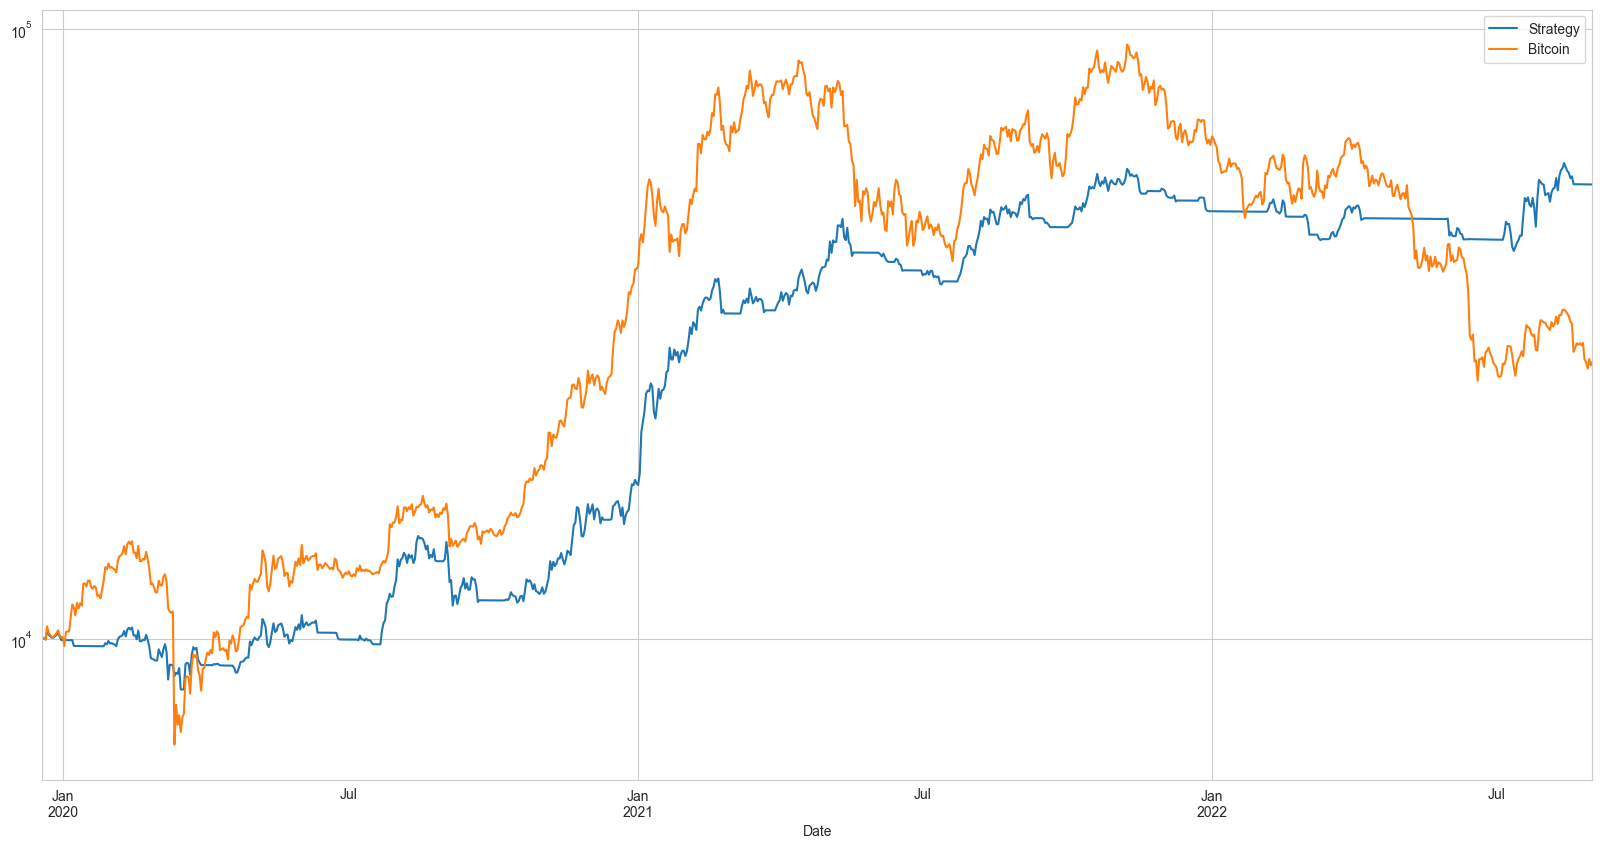

# Fund Statistics

In [8]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2022-08-31  2022-08-31
Risk-free rate       0.00%       0.00%

Total Return         13.72%      -45.92%
Daily Sharpe         0.91        -1.80
Daily Sortino        1.65        -2.58
CAGR                 46.93%      -84.12%
Max Drawdown         -11.52%     -52.20%
Calmar Ratio         4.07        -1.61

MTD                  0.06%       -13.92%
3m                   13.74%      -35.87%
6m                   -           -
YTD                  13.72%      -45.92%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  46.93%      -84.12%

Daily Sharpe         0.91        -1.80
Daily Sortino        1.65        -2.58
Daily Mean (ann.)    33.05%      -108.31%
Daily Vol (ann.)     36.51%      60.05%
Daily Skew           1.27        -0.68
Daily K

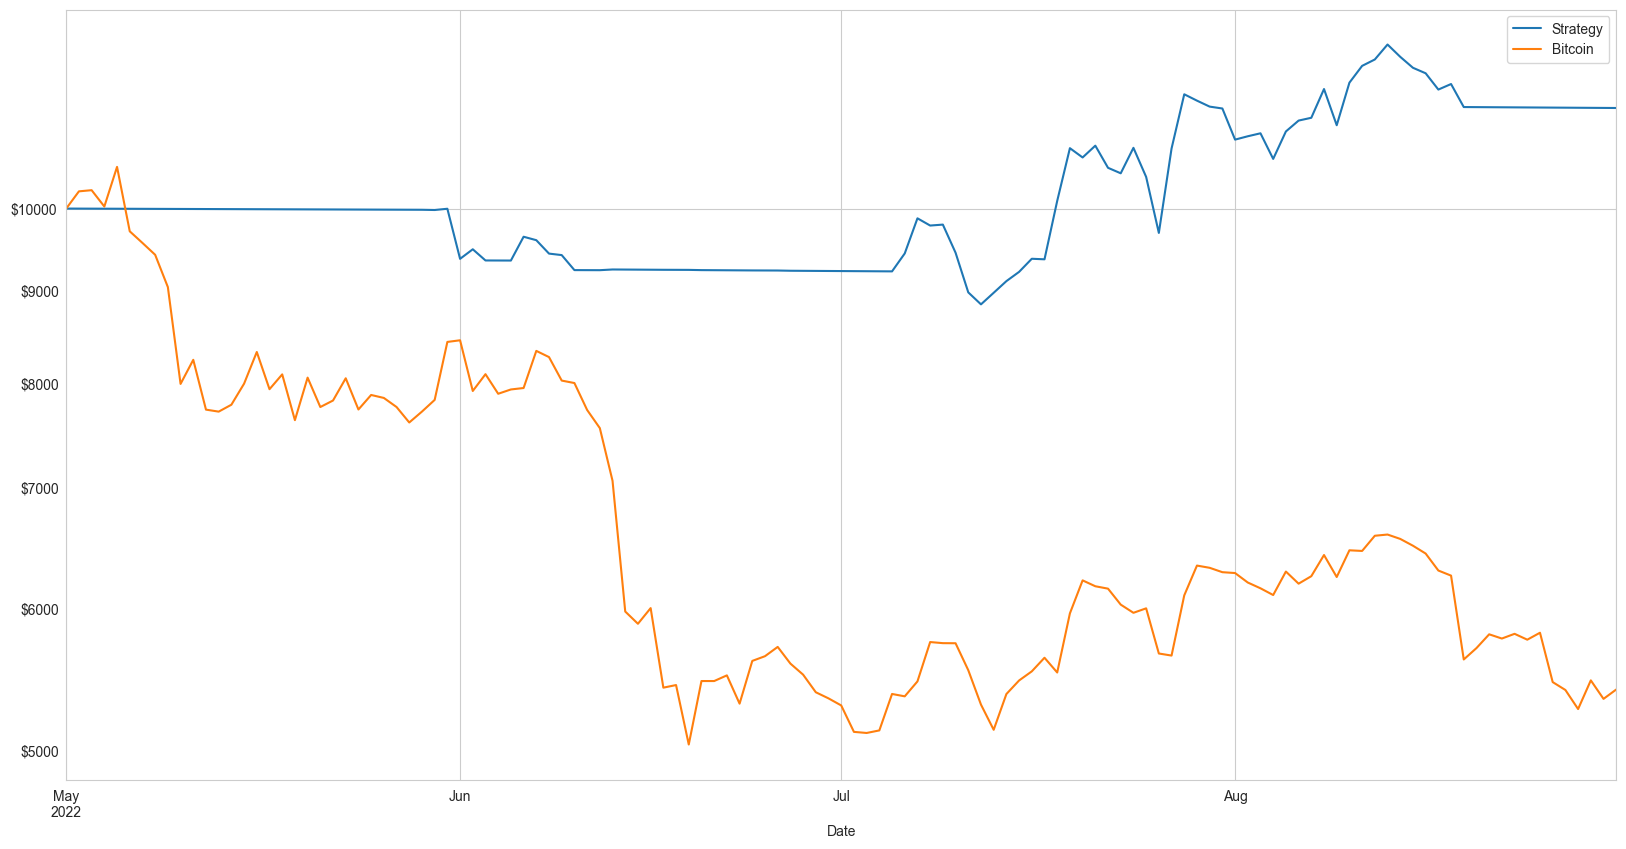

In [49]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(figsize=(20, 10), logy=True)
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")


# Full History

In [9]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2022-08-31  2022-08-31
Risk-free rate       0.00%       0.00%

Total Return         456.61%     184.64%
Daily Sharpe         1.39        0.75
Daily Sortino        2.42        1.20
CAGR                 88.88%      47.33%
Max Drawdown         -26.66%     -71.91%
Calmar Ratio         3.33        0.66

MTD                  0.06%       -13.92%
3m                   13.74%      -35.87%
6m                   12.96%      -52.84%
YTD                  10.63%      -55.96%
1Y                   10.72%      -56.79%
3Y (ann.)            88.88%      47.33%
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  88.88%      47.33%

Daily Sharpe         1.39        0.75
Daily Sortino        2.42        1.20
Daily Mean (ann.)    50.40%      47.13%
Daily Vol (ann.)     36.19%      62.82%
Daily Skew           0.57        -0.81

/Users/jmp/.pyenv/versions/3.8.2/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


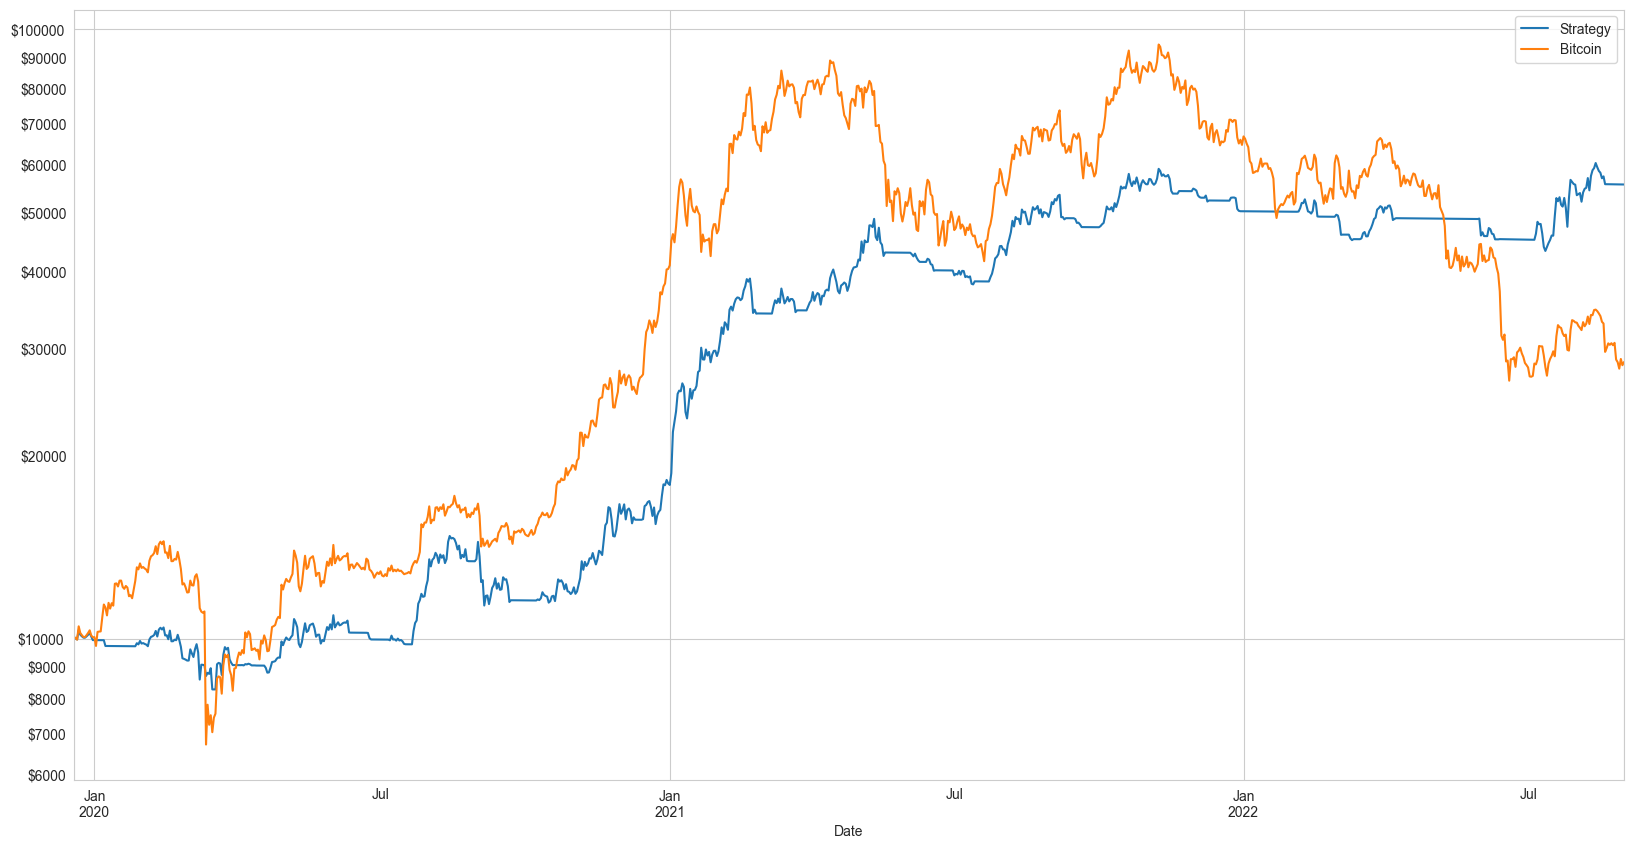

In [50]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(figsize=(20, 10), logy=True)
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")

In [10]:
strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(total_return)
strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date  Date
2019  12     -0.0041
2020  1      -0.0130
      2      -0.0639
      3      -0.0172
      4       0.0784
      5       0.0441
      6      -0.0877
      7       0.2512
      8       0.0009
      9      -0.1981
      10      0.0315
      11      0.3690
      12      0.1214
2021  1       0.6273
      2       0.1533
      3       0.0415
      4       0.1365
      5       0.0263
      6      -0.0649
      7       0.1174
      8       0.1540
      9      -0.0904
      10      0.1764
      11     -0.0163
      12     -0.0793
2022  1      -0.0016
      2      -0.0189
      3       0.0081
      4      -0.0412
      5      -0.0002
      6      -0.0154
      7       0.2309
      8       0.0412
Name: Strategy, dtype: float64

# Calculate Correlation

In [11]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.8049
Bitcoin,0.8049,1.0000


In [12]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
strategy_corr

0.8049397791327537

# Calculate Beta

In [13]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
(strategy_vol, benchmark_vol)

(0.8489200005752203, 1.8265733514959592)

In [14]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
beta

0.37410459164136484